In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/shelter-animal-outcomes/sample_submission.csv.gz
/kaggle/input/shelter-animal-outcomes/train.csv.gz
/kaggle/input/shelter-animal-outcomes/test.csv.gz


# **Daten anschauen**

In [2]:
data = pd.read_csv("/kaggle/input/shelter-animal-outcomes/train.csv.gz")
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [3]:
test_data = pd.read_csv("/kaggle/input/shelter-animal-outcomes/test.csv.gz")
test_data.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


# AnimalTypen - 2 Kategorien

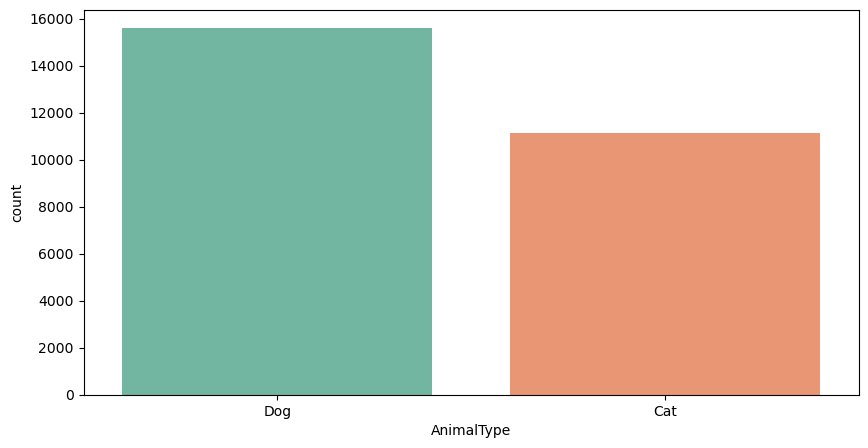

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
_ = sns.countplot(data=data, x='AnimalType', palette='Set2')

# OutcomeTypen - 5 Kategorien
Zielstellung - Prognose für OutcomeTypen

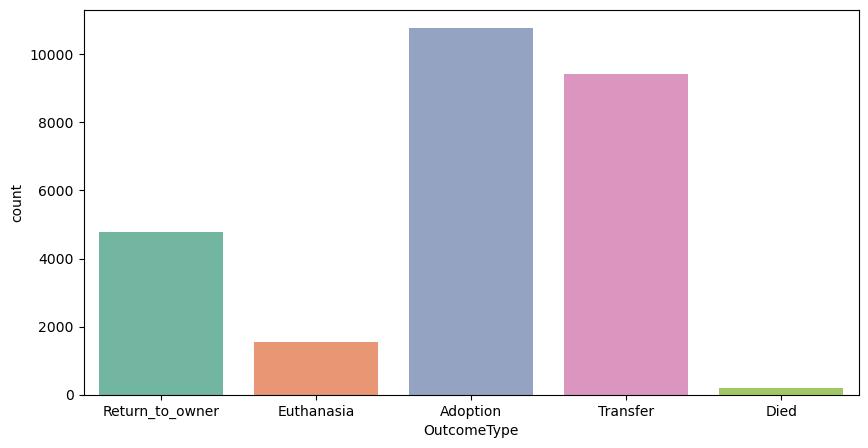

In [5]:
plt.figure(figsize=(10, 5))
_ = sns.countplot(data=data, x='OutcomeType', palette='Set2')

# OutcomeTypen bei Hunden und Katzen

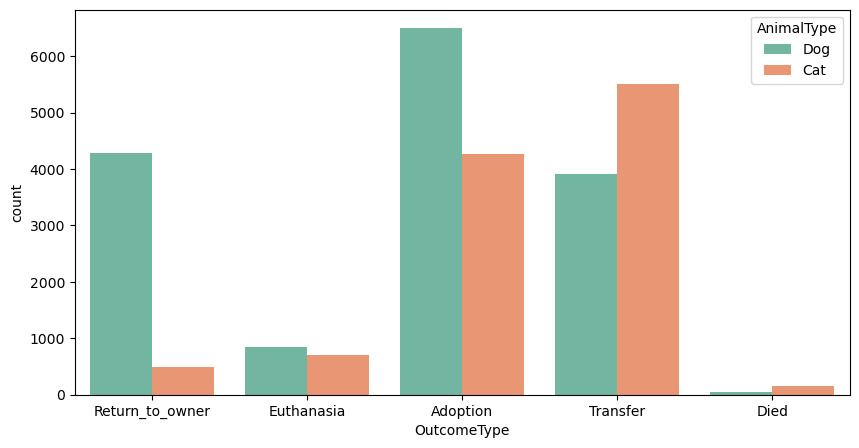

In [6]:
plt.figure(figsize=(10, 5))
_ = sns.countplot(data=data, x='OutcomeType', hue="AnimalType", palette='Set2')

# SexuponOutcome

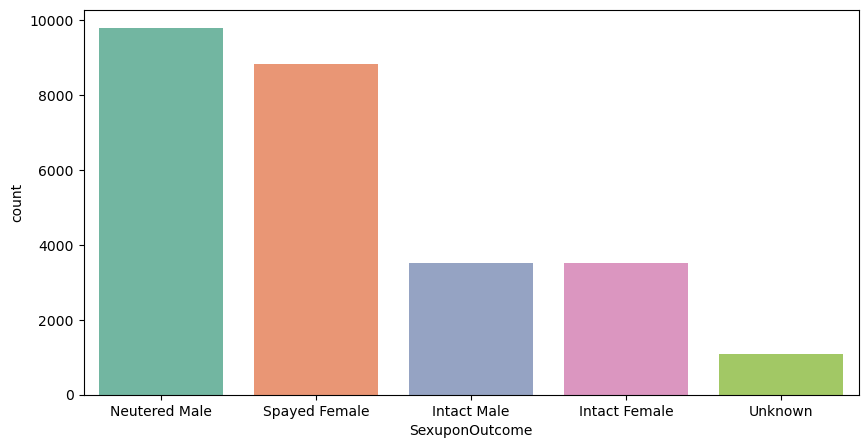

In [7]:
plt.figure(figsize=(10, 5))
_ = sns.countplot(data=data, x='SexuponOutcome', palette='Set2')

# SexuponOutcome und OutcomeType Beziehung

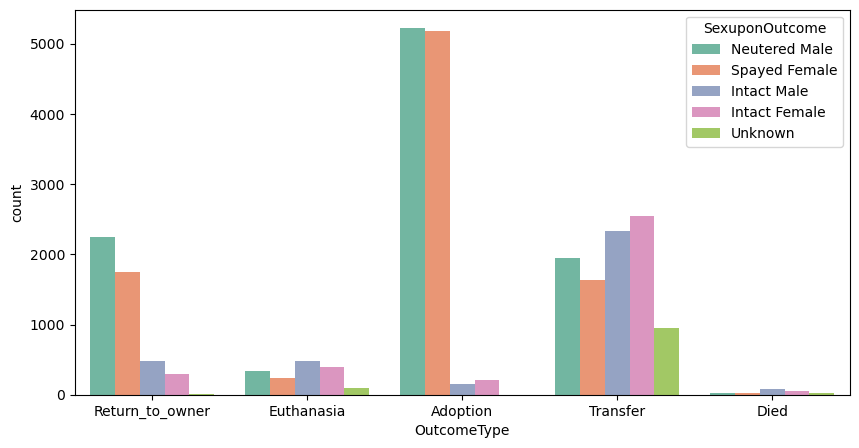

In [8]:
plt.figure(figsize=(10, 5))
_ = sns.countplot(data=data, x='OutcomeType', hue="SexuponOutcome", palette='Set2')

 # **Daten in numerische Format umwandeln**
 
*  jede Kategorie bekommt eine Zahl

In [9]:
from sklearn.preprocessing import LabelEncoder

# 0 - 'Adoption', 1 - 'Died', 2 - 'Euthanasia', 3 - Return_to_owner', 4 - 'Transfer' 
label_outcome = LabelEncoder().fit_transform(data.OutcomeType)  

# 0 - 'Cat', 1 - 'Dog'
label_type = LabelEncoder().fit_transform(data.AnimalType)

# 0 - 'Intact Female', 1 - 'Intact Male', 2 - 'Neutered Male', 3 - 'Spayed Female', 4 - 'Unknown', 5 - nan
label_sex = LabelEncoder().fit_transform(data.SexuponOutcome)

label_color = LabelEncoder().fit_transform(data.Color)

data = data.drop(['OutcomeType','AnimalType', 'SexuponOutcome'], axis=1)

data['OutcomeType'] = label_outcome
data['AnimalType'] = label_type
data['SexuponOutcome'] = label_sex
data['Color'] = label_color

data.head()

,AnimalID,Name,DateTime,OutcomeSubtype,AgeuponOutcome,Breed,Color,OutcomeType,AnimalType,SexuponOutcome
0,A671945,Hambone,2014-02-12 18:22:00,NaN,1 year,Shetland Sheepdog Mix,130,3,1,2
1,A656520,Emily,2013-10-13 12:44:00,Suffering,1 year,Domestic Shorthair Mix,167,2,0,3
2,A686464,Pearce,2015-01-31 12:28:00,Foster,2 years,Pit Bull Mix,86,0,1,2
3,A683430,NaN,2014-07-11 19:09:00,Partner,3 weeks,Domestic Shorthair Mix,42,4,0,1
4,A667013,NaN,2013-11-15 12:52:00,Partner,2 years,Lhasa Apso/Miniature Poodle,274,4,1,2


# Nan-Werte eliminieren

In [10]:
data.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeSubtype    13612
AgeuponOutcome       18
Breed                 0
Color                 0
OutcomeType           0
AnimalType            0
SexuponOutcome        0
dtype: int64

In [11]:
 # Wir behalten nur die Datensätze die keine nan Werte haben
data = data[data['AgeuponOutcome'].notna()]
data = data[data['SexuponOutcome'].notna()]

# Name in numerische Format

In [12]:
# 1 - hat Name, 0 - hat keinen Name
data.Name = data.Name.replace(np.nan,0)
data.Name = [1 if x!=0 else 0 for x in data.Name]

# Age Elemente anschauen
* Alter ist immer mit 'day', 'month' oder 'year gegeben.

In [13]:
number = sum ([1 if 'month' or 'year' or 'day' in a else 0 for a in data.AgeuponOutcome])
# eindeutige Elemente
options = set([age.split(' ')[1] for age in data.AgeuponOutcome]) 
print('Elemente: ', options)
print('Anzahl der Datensätze: ', data.shape[0], '\nDaten die das Wort year/month/day enthalten: ', number)

Elemente:  {'week', 'weeks', 'year', 'days', 'years', 'months', 'month', 'day'}
Anzahl der Datensätze:  26711 
Daten die das Wort year/month/day enthalten:  26711


-> wir können Alter in Tage Nummer umwandeln

In [14]:
def age_in_days(age):
    if pd.isnull(age):
        return 0
    value = int(age.split(' ')[0])
    timetype =  age.split(' ')[1]
    if 'day' in timetype:
        return value
    if 'week' in timetype:
        return value * 7
    if 'month' in timetype:
        return value * 30
    if 'year' in timetype:
        return value * 356

data.AgeuponOutcome = [age_in_days(x) for x in data.AgeuponOutcome]

# Daten in Jahreszeit, Jahr, WochenTag umwandeln

In [15]:
# 0 - Frühling, 1 - Sommer, 2 - Herbst, 3 - Winter
def get_season(x):
    month = int(x.split('-')[1])
    if month in [3,4,5]:
        return 0
    if month in [6,7,8]:
        return 1
    if month in [9,10,11]:
        return 2
    if month in [12,1,2]:
        return 3
    
def get_year(x):
    return int(x.split('-')[0])

import datetime
def get_weekday(d):
    date = d.split(' ')[0]
    year, month, day = (int(i) for i in date.split('-'))   
    return datetime.date(year, month, day).strftime('%A')
    
data['Season'] = [get_season(x) for x in data.DateTime]
data['Year'] =  [get_year(x) for x in data.DateTime]

data['WeekDay'] = [get_weekday(x) for x in data.DateTime]
label_weekday = LabelEncoder().fit_transform(data.WeekDay)
data = data.drop('WeekDay', axis=1)
data['WeekDay'] = label_weekday

# Breed in Reinressige/Mischlunge Typen verteilen

In [16]:
def purebred(x):
    if pd.isnull(x):
        return False
    return 'Mix' in x

# 1 - Reinressig, 0 - Mischlung
data.Breed = [0 if 'Mix' in x else 1 for x in data.Breed] 

# **Features**

In [17]:
y = data['OutcomeType']

features = ['Name', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color', 'Year','Season', 'WeekDay'] 
X = data[features]
X.head()

,Name,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Season,WeekDay
0,1,1,2,356,0,130,2014,3,6
1,1,0,3,356,0,167,2013,2,3
2,1,1,2,712,0,86,2015,3,2
3,0,0,1,21,0,42,2014,1,0
4,0,1,2,712,1,274,2013,2,0


# Trainieren
* 25 % für Validierung, 75 % für eigentliche Trainieren

In [18]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25)

# Hyperparameter Optimization

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 15]
             }

model = DecisionTreeClassifier()
grid_obj = GridSearchCV(model, parameters)
grid_obj = grid_obj.fit(train_X, train_y)

# Beste Parameter-Kombination
model = grid_obj.best_estimator_

model


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=5, min_samples_split=100)

# Cross-Validation
* mit 3 Klassifikatoren

In [20]:
from scipy.io import arff
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from numpy import loadtxt
from sklearn import tree


def cv(clf,features,classes,n):
    folds = np.random.choice(np.arange(n),features.shape[0],replace=True)
    acc = np.arange(n).astype("double")
    for i in range(n):
        train = features.loc[folds != i,:]
        ytrain = classes.loc[folds != i].astype("str")
        clf.fit(train,ytrain)
        
        val = features.loc[folds == i,:]
        yval = classes.loc[folds == i].astype("str")
        
        p = clf.predict(val)
        acc[i]=sum(p == yval)/len(p)
    return np.mean(acc)

X=train_X
y=train_y
acctree = cv(model,X,y,10)

acclda = cv(LinearDiscriminantAnalysis(), X, y,10)
accqda = cv(QuadraticDiscriminantAnalysis(), X, y,10)
print('DecisionTreeClassifier: ', acctree*100, '%')
print('LinearDiscriminantAnalysis: ', acclda*100, '%')
print('QuadraticDiscriminantAnalysis: ', accqda*100, '%')

DecisionTreeClassifier:  63.37959634621042 %
LinearDiscriminantAnalysis:  55.711064010847636 %
QuadraticDiscriminantAnalysis:  59.19793540647647 %


-> die beste Wahl: DecisionTreeClassifier

In [21]:
model.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=5, min_samples_split=100)

# Accuracy

In [22]:
import sklearn.metrics as metrics

pred_y = model.predict(val_X)
accuracy = metrics.accuracy_score(val_y, pred_y)
print("Accuracy für getestete Werte: ", accuracy*100, '%')

predd_y = model.predict(train_X)
accuracy = metrics.accuracy_score(train_y, predd_y)
print("Accuracy für eigentliche Trainingsdaten: ", accuracy*100, '%')

Accuracy für getestete Werte:  62.848158131177 %
Accuracy für eigentliche Trainingsdaten:  64.61338790994859 %


# Numerische Umwandlungen für Testdaten
* genauso wie bei Trainingsdaten
* am Ende IDs sind gebraucht für Submission Datei, aber für die Prognose nicht, deswegen sollen sie gespeichert werden.

In [23]:
test_IDs = test_data.ID 
# 0 - 'Cat', 1 - 'Dog'
label_test_type = LabelEncoder().fit_transform(test_data.AnimalType)
# 0 - 'Intact Female', 1 - 'Intact Male', 2 - 'Neutered Male', 3 - 'Spayed Female', 4 - 'Unknown', 5 - nan
label_test_sex = LabelEncoder().fit_transform(test_data.SexuponOutcome)
label_test_color = LabelEncoder().fit_transform(test_data.Color)

test = test_data.drop(['ID', 'AnimalType', 'SexuponOutcome', 'Color'], axis=1)
test['AnimalType'] = label_test_type
test['SexuponOutcome'] = label_test_sex
test['Color'] = label_test_color

test['Season'] = [get_season(x) for x in test.DateTime]
test['Year'] =  [get_year(x) for x in test.DateTime]
test['WeekDay'] = [get_weekday(x) for x in test.DateTime]
label_test_weekday = LabelEncoder().fit_transform(test.WeekDay)
test = test.drop(['WeekDay','DateTime'], axis=1)
test['WeekDay'] = label_test_weekday


test.Name = test.Name.replace(np.nan,0)
test.Name = [1 if x!=0 else 0 for x in test.Name]
test.AgeuponOutcome = [(age_in_days(x)) for x in test.AgeuponOutcome]
test.Breed = [0 if purebred(x) else 1 for x in test.Breed] # 1 für reinressig, 0 für mix
test.head()

,Name,AgeuponOutcome,Breed,AnimalType,SexuponOutcome,Color,Season,Year,WeekDay
0,1,300,0,1,0,185,2,2015,1
1,1,712,1,1,3,28,1,2014,2
2,1,356,0,0,2,79,3,2016,6
3,1,120,0,1,1,229,3,2013,2
4,1,712,0,1,2,238,2,2015,4


* Reihenfolge der Features festlegen (muss mit val_X stimmen)

In [24]:
val_X.columns

Index(['Name', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed',
       'Color', 'Year', 'Season', 'WeekDay'],
      dtype='object')

*  Zusätzlich wir eliminieren ID, Name.

In [25]:
test = test[['Name', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color', 'Year', 'Season', 'WeekDay']]
test.head()

,Name,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Season,WeekDay
0,1,1,0,300,0,185,2015,2,1
1,1,1,3,712,1,28,2014,1,2
2,1,0,2,356,0,79,2016,3,6
3,1,1,1,120,0,229,2013,3,2
4,1,1,2,712,0,238,2015,2,4


# Wahrscheinlichkeiten
* Für jedes Tier aus der Test-Datei soll die Wahrscheinlichkeit für jede Outcome gespeichert werden

In [26]:
probabilities_test = model.predict_proba(test)
probabilities_test

array([[0.04255319, 0.        , 0.06382979, 0.31914894, 0.57446809],
       [0.59701493, 0.        , 0.03731343, 0.24129353, 0.12437811],
       [0.45038168, 0.        , 0.        , 0.11450382, 0.4351145 ],
       ...,
       [0.        , 0.06493506, 0.20779221, 0.        , 0.72727273],
       [0.59883721, 0.        , 0.02034884, 0.26744186, 0.11337209],
       [0.        , 0.        , 0.26470588, 0.44117647, 0.29411765]])

In [27]:
result = pd.DataFrame({'ID' : test_IDs,
                       'Adoption' : probabilities_test[:,0], 
                       'Died' :  probabilities_test[:,1],
                       'Euthanasia' :  probabilities_test[:,2],
                       'Return_to_owner' :  probabilities_test[:,3],
                       'Transfer':  probabilities_test[:,4]})

# 0 - 'Adoption', 1 - 'Died', 2 - 'Euthanasia', 3 - Return_to_owner', 4 - 'Transfer'
result.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.042553,0.0,0.063830,0.319149,0.574468
1,2,0.597015,0.0,0.037313,0.241294,0.124378
2,3,0.450382,0.0,0.000000,0.114504,0.435115
3,4,0.125000,0.0,0.000000,0.093750,0.781250
4,5,0.316456,0.0,0.056962,0.430380,0.196203


* Submission in csv speichern

In [28]:
result.to_csv("final_submission.csv", index=False)